<a href="https://colab.research.google.com/github/miya498/pytorch_basic/blob/main/th01_PyTorch%E3%81%AE%E5%9F%BA%E6%9C%AC%E6%A9%9F%E8%83%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.5 カスタムクラス定義

In [1]:
#グラフ描画用ライブラリ
import matplotlib.pyplot as plt

#円描画に必要なライブラリ
import matplotlib.patches as patches

In [2]:
#クラスPointの定義

class Point:
  #インスタンス生成時にx,yの引数をもつ
  def __init__(self,x,y):
    self.x=x
    self.y=y

  def draw(self):
    plt.plot(self.x,self.y,marker='o',markersize=10,c='k')

p1=Point(2,3)
p2=Point(-1,-2)

print(p1.x,p1.y)
print(p2.x,p2.y)


2 3
-1 -2


<function matplotlib.pyplot.show(close=None, block=None)>

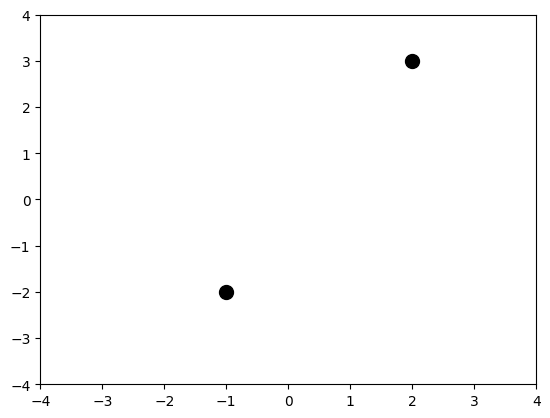

In [3]:
#p1,p2のdraw関数を呼び出す
p1.draw()
p2.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show

1 0 2


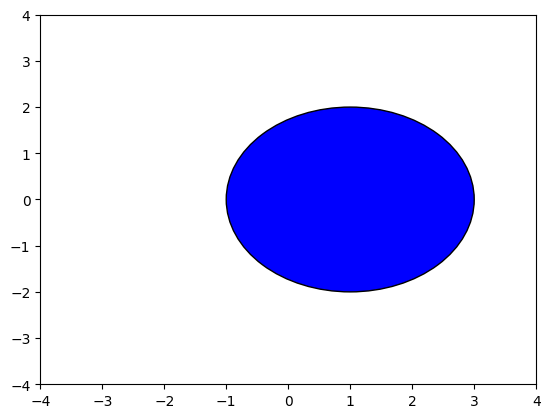

In [4]:
#クラスの継承

class Circle1(Point):
  def __init__(self,x,y,r):
    #親クラスのPointの__init__関数を呼び出す
    super().__init__(x,y)
    self.r=r
  #子クラス独自の定義
  def draw(self):
    #patches.Circle(xy=は中心のx,y座標　radius=は半径　)
    c=patches.Circle(xy=(self.x,self.y),radius=self.r,fc='b',ec='k')
    ax.add_patch(c)

c1_1=Circle1(1,0,2)
print(c1_1.x, c1_1.y, c1_1.r)
ax = plt.subplot()
c1_1.draw()
plt.xlim(-4,4)
plt.ylim(-4,4)
plt.show()

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


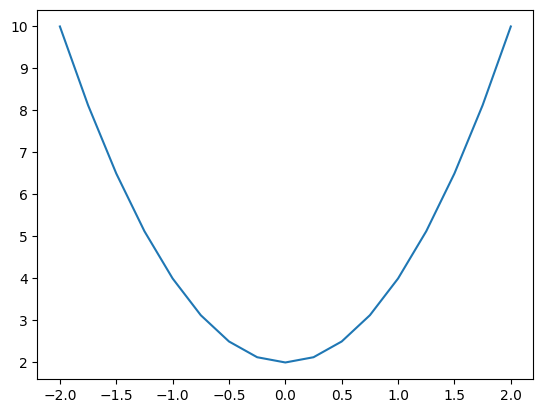

In [5]:
import numpy as np

class H:
  def __call__(self,x):
    return 2*x**2+2

x=np.arange(-2,2.1,0.25)
print(x)
h=H()

y=h(x)
print(y)
plt.plot(x,y)
plt.show()

# 2.2テンソル

In [6]:
#PyTorchライブラリ

import torch

#0階テンソル

r0=torch.tensor(1.0).float()

#type
print(type(r0))

#dtype
print(r0.dtype)

print(r0.shape)
print(r0.data)

<class 'torch.Tensor'>
torch.float32
torch.Size([])
tensor(1.)


In [7]:
#1階テンソル

r1_np=np.array([1,2,3,4,5])
print(r1_np.shape)

#numpyからテンソル変換
r1=torch.tensor(r1_np).float()

#dtype
print(r1.dtype)

print(r1.shape)
print(r1.data)

(5,)
torch.float32
torch.Size([5])
tensor([1., 2., 3., 4., 5.])


In [8]:
#2階テンソル

r2_np=np.array([[1,2,3],[4,5,6]])
print(r2_np.shape)

#numpyからテンソル変換
r2=torch.tensor(r2_np).float()

#dtype
print(r2.dtype)

print(r2.shape)
print(r2.data)

(2, 3)
torch.float32
torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [9]:
#3階テンソル

#乱数seedの初期化
torch.manual_seed(123)

#shape=[3,2,2]の正規分布テンソル

r3=torch.randn((3,2,2))
print(r3.shape)

print(r3.data)

torch.Size([3, 2, 2])
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [10]:
#4階テンソル

#shape=[2,3,2,2]の正規分布テンソル
#torch.ones関数はすべて1.0が入る
r4=torch.ones((2,3,2,2))
print(r4.shape)

print(r4.data)

torch.Size([2, 3, 2, 2])
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [11]:
#r1は64ビット符号あり整数に変換
r5=r1.long()

print(r5.dtype)
print(r5)

torch.int64
tensor([1, 2, 3, 4, 5])


In [12]:
#2階化　要素数を-1と指定すると自動で調整
r6=r3.view(3,-1)

print(r6.shape)
print(r6.data)

torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [13]:
#r3を１階化
r7=r3.view(-1)

print(r7.shape)
print(r7.data)



torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [14]:
#0階テンソルはitem関数で値を取り出す
#1階テンソル以上では使えない
item=r0.item()

print(type(item))
print(item)

<class 'float'>
1.0


In [15]:
print(r2)

#max関数で最大値を取得
print(r2.max())

tensor([[1., 2., 3.],
        [4., 5., 6.]])
tensor(6.)


In [16]:
#torch.max関数　２つめの引数はどの軸で収束するかを表す P74参照

print(torch.max(r2,1))

print(torch.max(r2,1)[1])

torch.return_types.max(
values=tensor([3., 6.]),
indices=tensor([2, 2]))
tensor([2, 2])


In [17]:
#テンソルをnumpyに変換
r2_np=r2.data.numpy()
print(type(r2_np))

print(r2_np)

<class 'numpy.ndarray'>
[[1. 2. 3.]
 [4. 5. 6.]]


In [18]:
x_np=np.arange(-2,2.1,0.25)

print(x_np)

#requires_grad=True とする
x=torch.tensor(x_np,requires_grad=True,dtype=torch.float32)

print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


tensor([10.0000,  8.1250,  6.5000,  5.1250,  4.0000,  3.1250,  2.5000,  2.1250,
         2.0000,  2.1250,  2.5000,  3.1250,  4.0000,  5.1250,  6.5000,  8.1250,
        10.0000], grad_fn=<AddBackward0>)


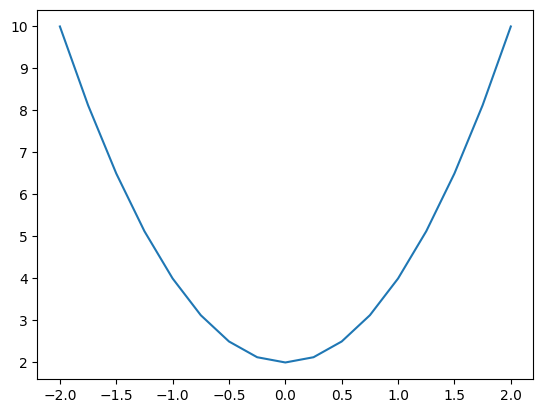

In [19]:
y=2*x**2+2

print(y)

plt.plot(x.data,y.data)

In [ ]:
#勾配計算のために1階テンソルをスカラー化する
z=y.sum()

!pip install torchviz
from torchviz import make_dot

g=make_dot(z,params={'x':x})

display(g)

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 691.0 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 11.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━ 113.8/166.0 MB 100.6 MB/s eta 0:00:01

In [ ]:
#勾配計算
z.backward()

print(x.grad)

plt.plot(x.data,y.data,c='b',label='y')
plt.plot(x.data,x.grad.data,c='k',label='y.grad')
plt.legend()
plt.show()
#勾配初期化
x.grad.zero_()


#2.3シグモイド関数#

In [ ]:
#シグモイド関数の定義
sigmoid=torch.nn.Sigmoid()

y=sigmoid(x)

plt.plot(x.data,y.data)
plt.show()

z=y.sum()

g=make_dot(z,params={'x':x})
display(g)

In [ ]:
z.backward()
print(x.grad)

plt.plot(x.data,y.data,c='b',label='y')
plt.plot(x.data,x.grad.data,c='k',label='y.grad')
plt.legend()
plt.show()